In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [4]:
dk=df.rename(columns={'Data':'Date', 'Final de Semana':'weekend', 'Consumo de cerveja (litros)':'consumption', 'Precipitacao (mm)':'precipitation'})
dk

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),precipitation,weekend,consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dh=dk.dropna()
dh

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),precipitation,weekend,consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [6]:
dh['Temperatura Media (C)'] = dh['Temperatura Media (C)'].str.replace(',', '.').astype(float)
dh['Temperatura Maxima (C)'] = dh['Temperatura Maxima (C)'].str.replace(',', '.').astype(float)
dh['Temperatura Minima (C)'] = dh['Temperatura Minima (C)'].str.replace(',', '.').astype(float)
dh['precipitation'] = dh['precipitation'].str.replace(',', '.').astype(float)

/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/56904361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['Temperatura Media (C)'] = dh['Temperatura Media (C)'].str.replace(',', '.').astype(float)
/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/56904361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['Temperatura Maxima (C)'] = dh['Temperatura Maxima (C)'].str.replace(',', '.').astype(float)
/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/56904

In [7]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    365 non-null    object 
 1   Temperatura Media (C)   365 non-null    float64
 2   Temperatura Minima (C)  365 non-null    float64
 3   Temperatura Maxima (C)  365 non-null    float64
 4   precipitation           365 non-null    float64
 5   weekend                 365 non-null    float64
 6   consumption             365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [8]:
dh['Date'] = pd.to_datetime(dh['Date'])
dh['Month'] = dh['Date'].dt.month_name()
dh['Day'] = dh['Date'].dt.day_name()
dh.head()

/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/4251930739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['Date'] = pd.to_datetime(dh['Date'])
/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/4251930739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh['Month'] = dh['Date'].dt.month_name()
/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/4251930739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),precipitation,weekend,consumption,Month,Day
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,January,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,January,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,January,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,January,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,January,Monday


weekly beer consumptiion

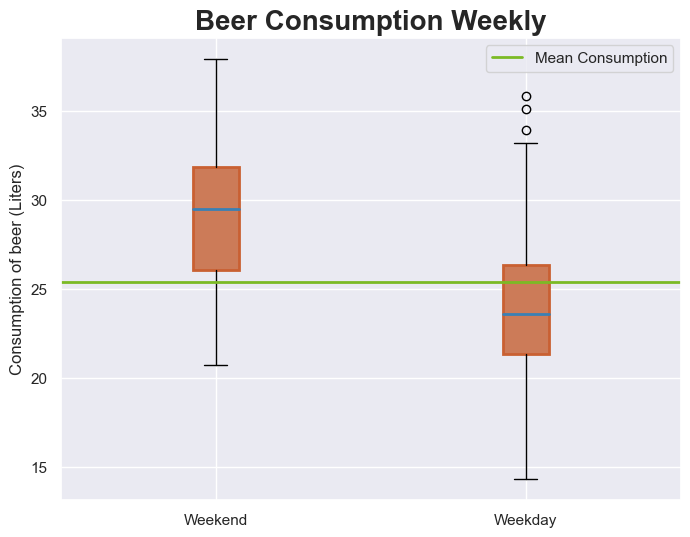

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

weekend = dh.loc[dh.weekend == 1.0].consumption
weekday = dh.loc[dh.weekend == 0].consumption

array = [weekend, weekday]
labels = ['Weekend', 'Weekday']

fig = plt.boxplot(array, labels=labels, patch_artist=True, medianprops={'linewidth':2, 'color':'#3a80b5'})
plt.title('Beer Consumption Weekly', fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel('Consumption of beer (Liters)')
plt.axhline(dh['consumption'].mean(), color='#7cba25', lw=2, label='Mean Consumption')
plt.legend();

for box in fig['boxes']:
    box.set(color='#c96032', facecolor='#cc7b58', linewidth=2)

plt.show()

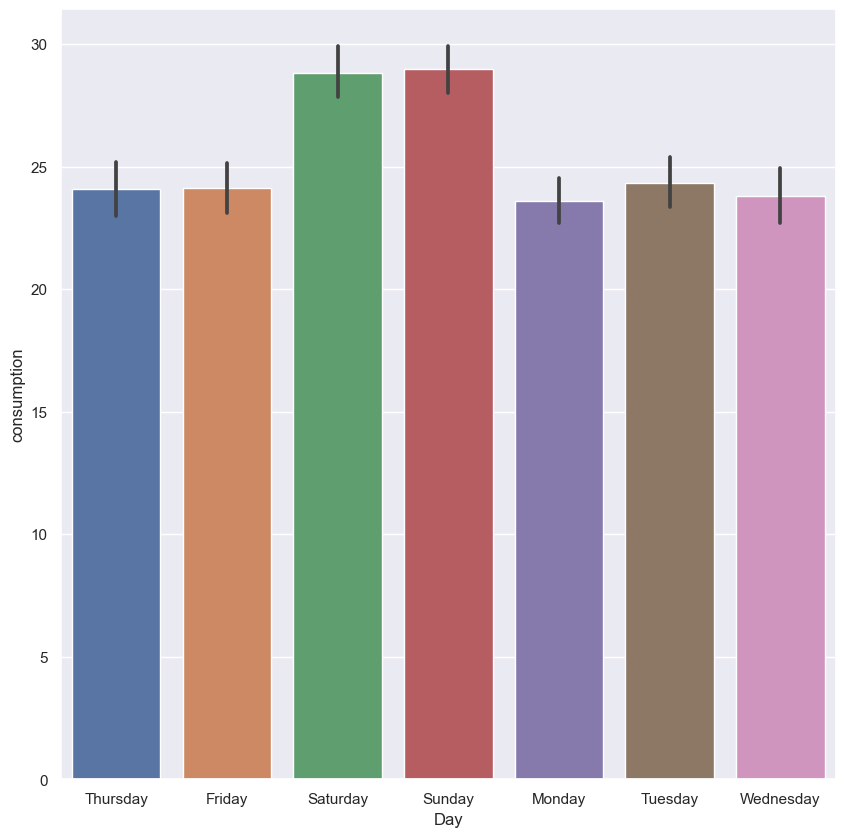

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x="Day",y="consumption",data=dh)
plt.show()

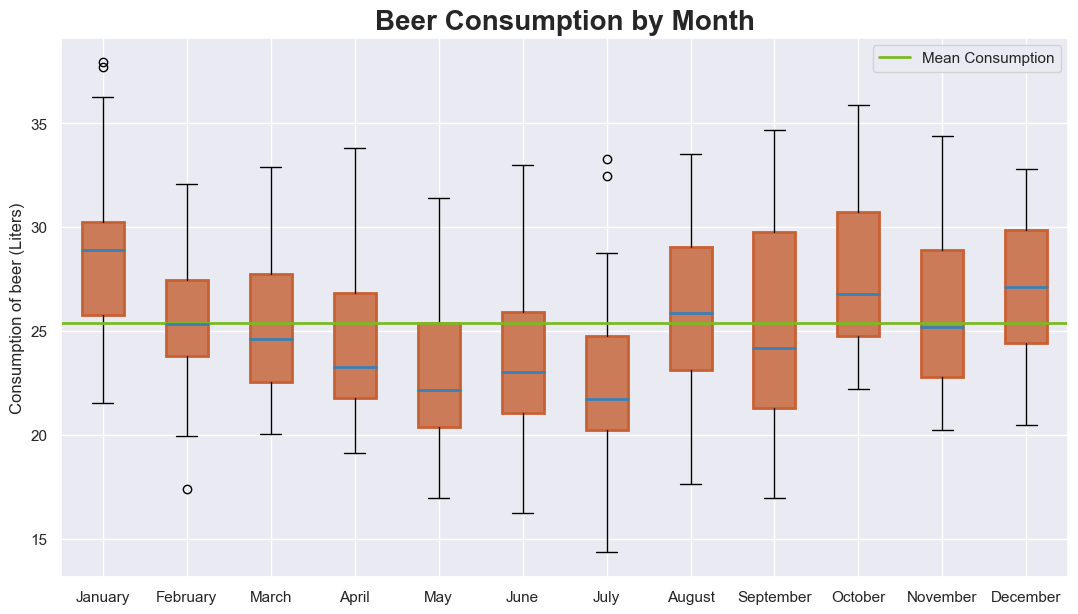

In [11]:
plt.figure(figsize=(13, 7))

january = dh.loc[dh.Month == 'January'].consumption
february = dh.loc[dh.Month == 'February'].consumption
march =dh.loc[dh.Month == 'March'].consumption
april =dh.loc[dh.Month == 'April'].consumption
may = dh.loc[dh.Month == 'May'].consumption
june = dh.loc[dh.Month == 'June'].consumption
july = dh.loc[dh.Month == 'July'].consumption
august = dh.loc[dh.Month == 'August'].consumption
september = dh.loc[dh.Month == 'September'].consumption
october = dh.loc[dh.Month == 'October'].consumption
november = dh.loc[dh.Month == 'November'].consumption
december = dh.loc[dh.Month == 'December'].consumption

months = [january, february, march, april, may, june, july, august, september, october, november, december]
labels= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = plt.boxplot(months, labels=labels, patch_artist=True, medianprops={'linewidth':2, 'color':'#3a80b5'})
plt.title('Beer Consumption by Month', fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel('Consumption of beer (Liters)')
plt.axhline(dh['consumption'].mean(), color='#7cba25', lw=2, label='Mean Consumption')
plt.legend();

for box in fig['boxes']:
    box.set(color='#c96032', facecolor='#cc7b58', linewidth=2)

plt.show()

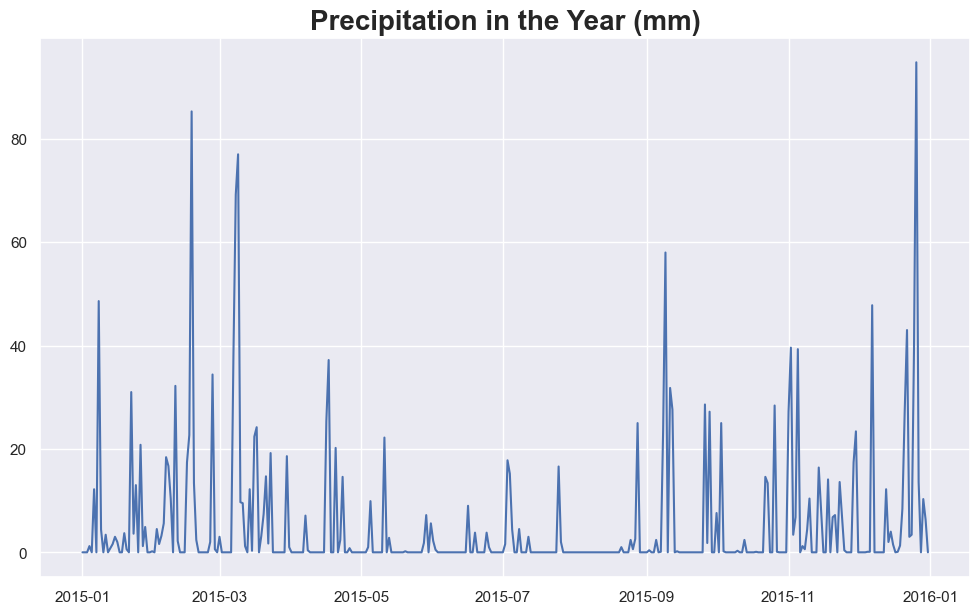

In [12]:

plt.figure(figsize=(12, 7))
plt.plot(dh.Date, dh.precipitation)
plt.title('Precipitation in the Year (mm)', fontdict={'fontsize':20, 'fontweight':'bold'});

plt.show()

/Users/sje/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipitation', ylabel='consumption'>

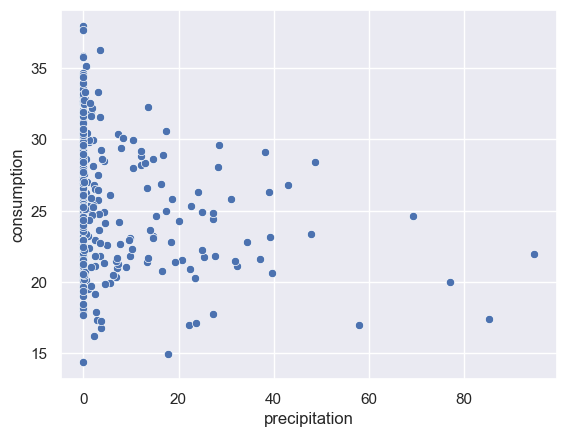

In [13]:
#강수량이 적을수록 소비량은 많지만, 브라질은 기온이 높을수록 강수량이 높기 때문에 강수량과 맥주판매량에 대한 관계는 미정임
sns.scatterplot(dh['precipitation'],dh['consumption'])

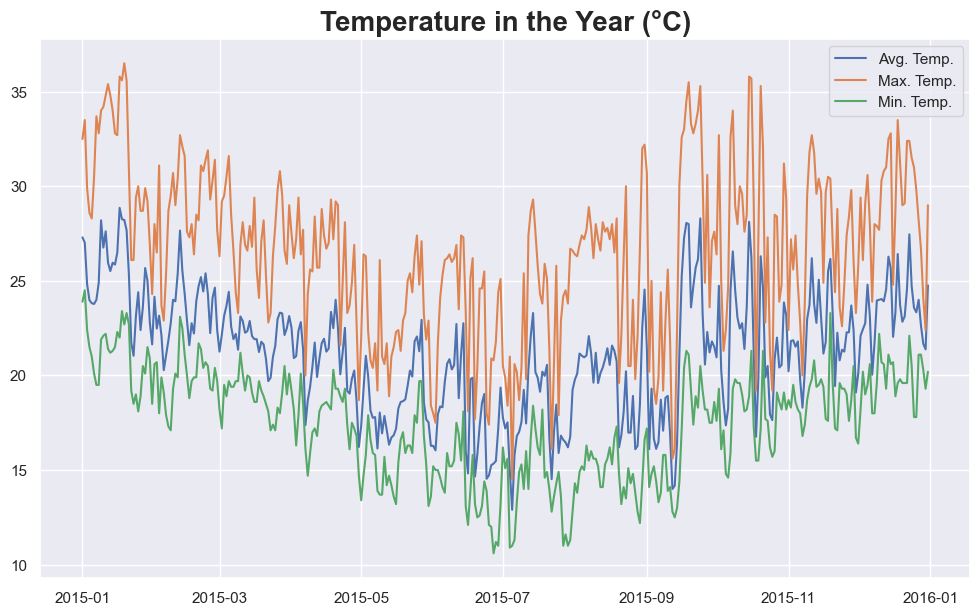

In [14]:
#온도별 소비량=월별 소비량과 비교해보면 온도가 높은 날에 소비량이 많음
plt.figure(figsize=(12, 7))

plt.plot(dh.Date, dh['Temperatura Media (C)'])
plt.plot(dh.Date, dh['Temperatura Maxima (C)'])
plt.plot(dh.Date, dh['Temperatura Minima (C)'])

plt.legend(['Avg. Temp.', 'Max. Temp.', 'Min. Temp.'])
plt.title('Temperature in the Year (°C)', fontdict={'fontsize':20, 'fontweight':'bold'});

plt.show()

/Users/sje/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperatura Maxima (C)', ylabel='consumption'>

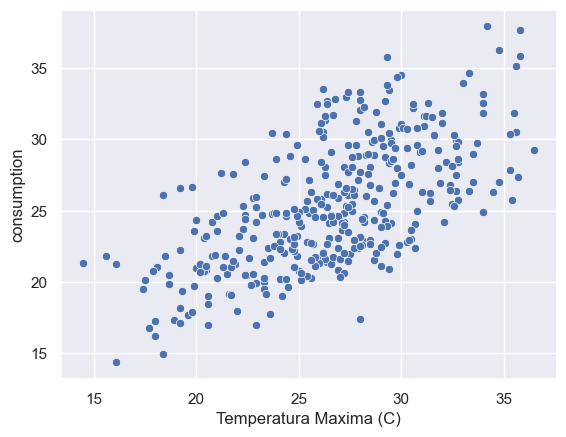

In [15]:
sns.scatterplot(dh['Temperatura Maxima (C)'],dh['consumption'])

In [16]:
correlation = dh.corr(method='pearson')
correlation

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),precipitation,weekend,consumption
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumption,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


<AxesSubplot:>

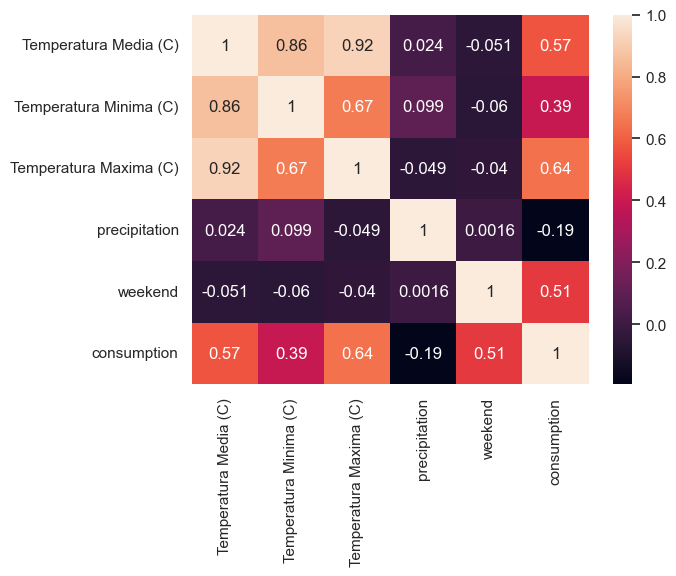

In [17]:
sns.heatmap(dh.corr(), annot = True)

In [18]:
print(correlation ['consumption'].sort_values(ascending=False).to_string())

consumption               1.000000
Temperatura Maxima (C)    0.642672
Temperatura Media (C)     0.574615
weekend                   0.505981
Temperatura Minima (C)    0.392509
precipitation            -0.193784


In [19]:
dh.drop(['Date','Month', 'Day'], axis=1, inplace=True)

/var/folders/p_/pjsz714n6kn3n913lkbj0d980000gn/T/ipykernel_30286/1628792373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh.drop(['Date','Month', 'Day'], axis=1, inplace=True)


In [20]:
X = dh.drop("consumption", axis=1)
y = dh["consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ac1 = r2_score(y_test, y_pred)

In [22]:
print(ac1)

0.6028607852216412


In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
ac2 = r2_score(y_test, y_pred)

In [24]:
print(ac2)

0.602294168587051


In [25]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
ac3 = r2_score(y_test, y_pred)

In [26]:
print(ac3)

0.34030275825018685


In [27]:
names = ["Ridge", "Linear Regression", "Lasso"]
scores = [ac1, ac2, ac3]

models = pd.DataFrame({"Model": names, "R2 Scores": scores})
models.head()

,Model,R2 Scores
0,Ridge,0.602861
1,Linear Regression,0.602294
2,Lasso,0.340303
